<a href="https://colab.research.google.com/github/Morioh/math_for_ml/blob/main/Calculus_Quiz_2/Mourice_Onyonyi__Quiz_2_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Write a dynamic function to find the derivative of any function f(x)

In [3]:
#TO DO: Create a function that does a derivative for any function
from sympy import symbols, diff, sympify

def dy_dx(func_str):
    """
    Calculates the derivative of a given function f(x) with respect to x.

    Parameters:
    - func_str (str): A string representation of the function f(x).

    Returns:
    - The derivative of the function as a SymPy expression.
    """
    x = symbols('x')  # Define the symbol for differentiation
    func = sympify(func_str)  # Convert the string function to a SymPy expression
    derivative = diff(func, x)  # Calculate the derivative with respect to x

    return derivative

# Task 2: Test the derivative function written with a quadratic equation of your choice
*NB: Must have atleast 2 minimas and atleast 2 maximas*

In [6]:
def f(x_val):
    """
    Tests the dy_dx function with a quartic equation example and evaluates
    the derivative at a specific value of x.

    Parameters:
    - x_val (int/float): The value of x at which to evaluate the derivative.
    """
    # Define the quartic equation as a string
    quartic_eqn = "x**4 - 2*x**3 - 8*x**2 + 18*x"

    # Call dy_dx to calculate the derivative of the quartic equation
    derivative_result = dy_dx(quartic_eqn)

    # Use SymPy to evaluate the derivative at x_val
    x = symbols('x')  # Re-define x for evaluation
    derivative_at_x = derivative_result.subs(x, x_val)

    # Print the original equation, its derivative, and the value of the derivative at x_val
    print(f"Original quartic equation: f(x) = {quartic_eqn}")
    print(f"Derivative of the quartic equation: f'(x) = {derivative_result}")
    print(f"Value of the derivative at x = {x_val}: f'({x_val}) = {derivative_at_x}")

# Example usage: evaluate the derivative at x = 1
f(1)


Original quartic equation: f(x) = x**4 - 2*x**3 - 8*x**2 + 18*x
Derivative of the quartic equation: f'(x) = 4*x**3 - 6*x**2 - 16*x + 18
Value of the derivative at x = 1: f'(1) = 0


#Task 3: Plot a graph of the quadratic Equation

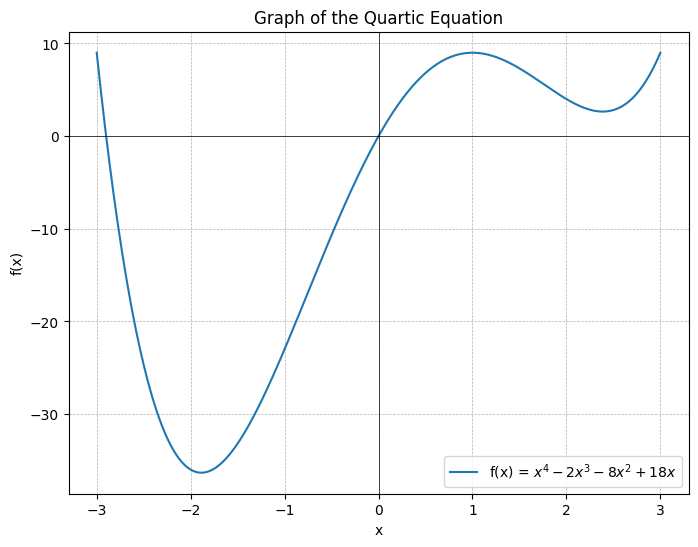

In [12]:
#Create a visualization of the quadratic equation
import numpy as np
import matplotlib.pyplot as plt

# Define the quartic function
def quartic_function(x):
    return x**4 - 2*x**3 - 8*x**2 + 18*x

# Generate a range of x values
x_values = np.linspace(-3, 3, 400)  # Adjusted range from -3 to 3

# Calculate the y values based on the quartic function
y_values = quartic_function(x_values)

# Plot the graph
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(x_values, y_values, label='f(x) = $x^4 - 2x^3 - 8x^2 + 18x$')  # Plot x and y values
plt.title('Graph of the Quartic Equation')  # Graph title
plt.xlabel('x')  # X-axis label
plt.ylabel('f(x)')  # Y-axis label
plt.axhline(0, color='black', lw=0.5)  # Draw x-axis
plt.axvline(0, color='black', lw=0.5)  # Draw y-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Enable grid
plt.legend()  # Show legend
plt.show()  # Display the plot


# Task 4: Create separate array of Minimas and maximas

In [10]:
from sympy import symbols, diff, solve

# Define the symbol and quartic function
x = symbols('x')
f = x**4 - 2*x**3 - 8*x**2 + 18*x

# First derivative of the function
f_prime = diff(f, x)

# Solve for critical points
critical_points = solve(f_prime, x)

# Second derivative of the function
f_double_prime = diff(f_prime, x)

# Arrays to store minima and maxima
minimas = []
maximas = []

# Classify each critical point
for point in critical_points:
    # Evaluate the second derivative at each critical point
    second_derivative_value = f_double_prime.subs(x, point)

    if second_derivative_value > 0:
        # If second derivative is positive, it's a minima
        minimas.append((point, f.subs(x, point)))
    elif second_derivative_value < 0:
        # If second derivative is negative, it's a maxima
        maximas.append((point, f.subs(x, point)))

# Display the minima and maxima
print("Minimas: ", minimas)
print("Maximas: ", maximas)



Minimas:  [(1/4 - sqrt(73)/4, -9*sqrt(73)/2 - 8*(1/4 - sqrt(73)/4)**2 + 9/2 + (1/4 - sqrt(73)/4)**4 - 2*(1/4 - sqrt(73)/4)**3), (1/4 + sqrt(73)/4, -8*(1/4 + sqrt(73)/4)**2 - 2*(1/4 + sqrt(73)/4)**3 + 9/2 + (1/4 + sqrt(73)/4)**4 + 9*sqrt(73)/2)]
Maximas:  [(1, 9)]


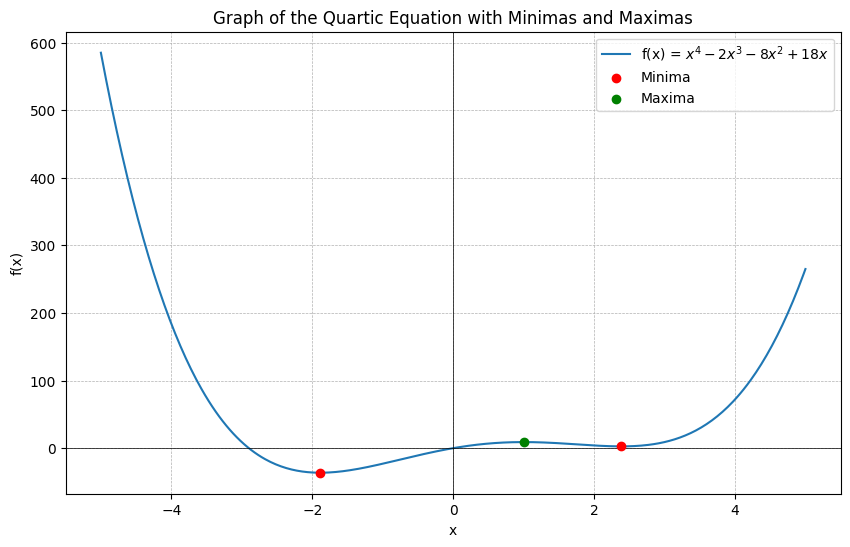

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, lambdify

# Define the symbol and quartic function
x = symbols('x')
f = x**4 - 2*x**3 - 8*x**2 + 18*x

# Calculate the first derivative and find critical points
f_prime = diff(f, x)
critical_points = solve(f_prime, x)

# Calculate the second derivative
f_double_prime = diff(f_prime, x)

# Arrays to store minima and maxima
minimas = []
maximas = []

# Classify each critical point
for point in critical_points:
    second_derivative_value = f_double_prime.subs(x, point)
    if second_derivative_value > 0:
        minimas.append((float(point), float(f.subs(x, point))))
    elif second_derivative_value < 0:
        maximas.append((float(point), float(f.subs(x, point))))

# Convert the function to a lambda for easier evaluation
f_lambdified = lambdify(x, f, modules=['numpy'])

# Generate a range of x values
x_values = np.linspace(-5, 5, 400)

# Calculate the y values based on the quartic function
y_values = f_lambdified(x_values)

# Plot the graph of the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = $x^4 - 2x^3 - 8x^2 + 18x$')

# Highlight the minima and maxima
for minima in minimas:
    plt.scatter(*minima, color='red', zorder=5, label='Minima' if minimas.index(minima) == 0 else "")
for maxima in maximas:
    plt.scatter(*maxima, color='green', zorder=5, label='Maxima' if maximas.index(maxima) == 0 else "")

plt.title('Graph of the Quartic Equation with Minimas and Maximas')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

#Finally, What is the global Minima and the Global maxima _ Plot this so that I can see

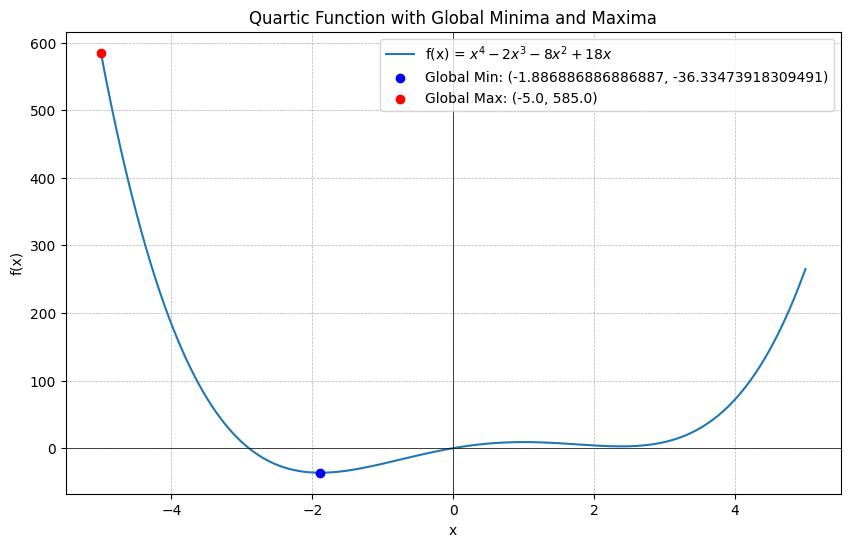

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, lambdify

# Define the symbol and quartic function
x = symbols('x')
f = x**4 - 2*x**3 - 8*x**2 + 18*x

# Convert the function for numerical evaluation
f_lambdified = lambdify(x, f, modules=['numpy'])

# Define the range for evaluating global extrema
x_range = np.linspace(-5, 5, 1000)

# Evaluate the function across the range and find global extrema
y_values = f_lambdified(x_range)
global_min_index = np.argmin(y_values)
global_max_index = np.argmax(y_values)
global_min = (x_range[global_min_index], y_values[global_min_index])
global_max = (x_range[global_max_index], y_values[global_max_index])

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_values, label='f(x) = $x^4 - 2x^3 - 8x^2 + 18x$')

# Highlight the global minima and maxima
plt.scatter(*global_min, color='blue', zorder=5, label=f'Global Min: {global_min}')
plt.scatter(*global_max, color='red', zorder=5, label=f'Global Max: {global_max}')

plt.title('Quartic Function with Global Minima and Maxima')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


# Things We did in Class

We came up with a functon

$$
f(x) = 4x^2 + x^-1
$$

So we create a fucntion in python



```
def f(x):
  #see our code below
```



In [ ]:
#This is an Example of a quadratic function
def f(x):
   return (4 * (x** 2)) + (x ** -1)

We manuall calculated the derivative  and got that
$$
df(x)/dx = 8x^1 + x^-2
$$

Using the formula above we find points where the derivative is 0

the values are:

$$
x1 = 0.5, x1 = - 0.5,x1 = 0,
$$

If you replace this in our original formula

$$
f(0.5) = 4(0.5)^2 + (0.5^-1 = -1.0
$$
$$
f(0) = 4x^2 + x^-1 = No solution
$$
$$
f(-0.5) = 4x^2 + x^-1 = 1
$$

Meaning our curve is flat at point $$(0.5,1) $$ and at $$ (-0.5,1)$$

Proof Pending........

Here is how we tried with code and got some errors

In [18]:


x1 = 0.5
x2 = -0.5
x3 = 0

y1 = f(x1)
y2 = f(x2)
y3 = f(x3)

print(y2)
(0.5,3)


TypeError: 'Add' object is not callable

# **You can now do the Rest.All the Best ........**